In [1]:
#Importing packages

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

In [5]:
# We gonna start by working on a single exemple and then we can loop over all the others
data_dir="csv_files_entire_data"
data_csv="2022-03-02.csv"


# 1- **Read raw data from excel file**

In [6]:
data=pd.read_csv(os.path.join(data_dir,data_csv), delimiter=';', error_bad_lines=False)
data.columns
print(data.shape)
data.head()


(2122, 23)


,V-----,SWVNR=2001253,SQNDL=6,DATE=22-03-02,TIME=00:00:11,THTYP=85,TTEMP=15,TDEWP=5,IUFAN=800,ILFAN=5,...,PYAVW=1,PYOST=0,MSDLY=60,FNDLY=30,OSTRG=3,DBGFL=0,ASIRE=0,DBGRE=0,MPPFL=-1,Unnamed: 22
0,C-----,P1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V-----,SWVNR=2001253,SQNDL=11,DATE=22-03-02,TIME=00:00:16,THTYP=85,TTEMP=15,TDEWP=5,IUFAN=800,ILFAN=5,...,PYAVW=1,PYOST=0,MSDLY=60,FNDLY=30,OSTRG=3,DBGFL=0,ASIRE=0,DBGRE=0,MPPFL=-1,NaN
2,SQNR=60,DATE=22-03-02,TIME=00:01:00,STAT=200222,TMPA=6,TMPP=63,TMPB=12,TMPC=15,RHUA=71,DWPA=1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SQNR=120,DATE=22-03-02,TIME=00:02:00,STAT=200222,TMPA=6,TMPP=63,TMPB=12,TMPC=15,RHUA=71,DWPA=1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SQNR=180,DATE=22-03-02,TIME=00:03:00,STAT=200222,TMPA=6,TMPP=63,TMPB=12,TMPC=15,RHUA=71,DWPA=1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.head()

,V-----,SWVNR=2001253,SQNDL=6,DATE=22-03-02,TIME=00:00:11,THTYP=85,TTEMP=15,TDEWP=5,IUFAN=800,ILFAN=5,...,PYAVW=1,PYOST=0,MSDLY=60,FNDLY=30,OSTRG=3,DBGFL=0,ASIRE=0,DBGRE=0,MPPFL=-1,Unnamed: 22
0,C-----,P1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V-----,SWVNR=2001253,SQNDL=11,DATE=22-03-02,TIME=00:00:16,THTYP=85,TTEMP=15,TDEWP=5,IUFAN=800,ILFAN=5,...,PYAVW=1,PYOST=0,MSDLY=60,FNDLY=30,OSTRG=3,DBGFL=0,ASIRE=0,DBGRE=0,MPPFL=-1,NaN
2,SQNR=60,DATE=22-03-02,TIME=00:01:00,STAT=200222,TMPA=6,TMPP=63,TMPB=12,TMPC=15,RHUA=71,DWPA=1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SQNR=120,DATE=22-03-02,TIME=00:02:00,STAT=200222,TMPA=6,TMPP=63,TMPB=12,TMPC=15,RHUA=71,DWPA=1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SQNR=180,DATE=22-03-02,TIME=00:03:00,STAT=200222,TMPA=6,TMPP=63,TMPB=12,TMPC=15,RHUA=71,DWPA=1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Function for removing unwanted columns

In [8]:
def deleting_columns(data):
    columns_2_keep=[data.columns[2],data.columns[13]]
    data=data.drop(columns=[col for col in data.columns if col not in columns_2_keep],axis=1)
    return data

data

,V-----,SWVNR=2001253,SQNDL=6,DATE=22-03-02,TIME=00:00:11,THTYP=85,TTEMP=15,TDEWP=5,IUFAN=800,ILFAN=5,...,PYAVW=1,PYOST=0,MSDLY=60,FNDLY=30,OSTRG=3,DBGFL=0,ASIRE=0,DBGRE=0,MPPFL=-1,Unnamed: 22
0,C-----,P1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V-----,SWVNR=2001253,SQNDL=11,DATE=22-03-02,TIME=00:00:16,THTYP=85,TTEMP=15,TDEWP=5,IUFAN=800,ILFAN=5,...,PYAVW=1,PYOST=0,MSDLY=60,FNDLY=30,OSTRG=3,DBGFL=0,ASIRE=0,DBGRE=0,MPPFL=-1,NaN
2,SQNR=60,DATE=22-03-02,TIME=00:01:00,STAT=200222,TMPA=6,TMPP=63,TMPB=12,TMPC=15,RHUA=71,DWPA=1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SQNR=120,DATE=22-03-02,TIME=00:02:00,STAT=200222,TMPA=6,TMPP=63,TMPB=12,TMPC=15,RHUA=71,DWPA=1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SQNR=180,DATE=22-03-02,TIME=00:03:00,STAT=200222,TMPA=6,TMPP=63,TMPB=12,TMPC=15,RHUA=71,DWPA=1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,SQNR=0,DATE=22-03-03,TIME=00:00:00,STAT=202222,TMPA=7,TMPP=72,TMPB=13,TMPC=15,RHUA=77,DWPA=3,...,PIRP=-7,PIRM=-7,PIRL=-8,PIRH=0,NaN,NaN,NaN,NaN,NaN,NaN
2118,C-----,H186394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2119,V-----,SWVNR=2001253,SQNDL=86392,DATE=22-03-03,TIME=23:59:57,THTYP=85,TTEMP=15,TDEWP=5,IUFAN=800,ILFAN=5,...,PYAVW=1,PYOST=0,MSDLY=60,FNDLY=30,OSTRG=3,DBGFL=0,ASIRE=0,DBGRE=0,MPPFL=-1,NaN
2120,C-----,U22-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.head()
data.columns

Index(['SQNDL=6', 'PYAVW=1'], dtype='object')

## 2- **Data Preprocessing and manipulation**

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o

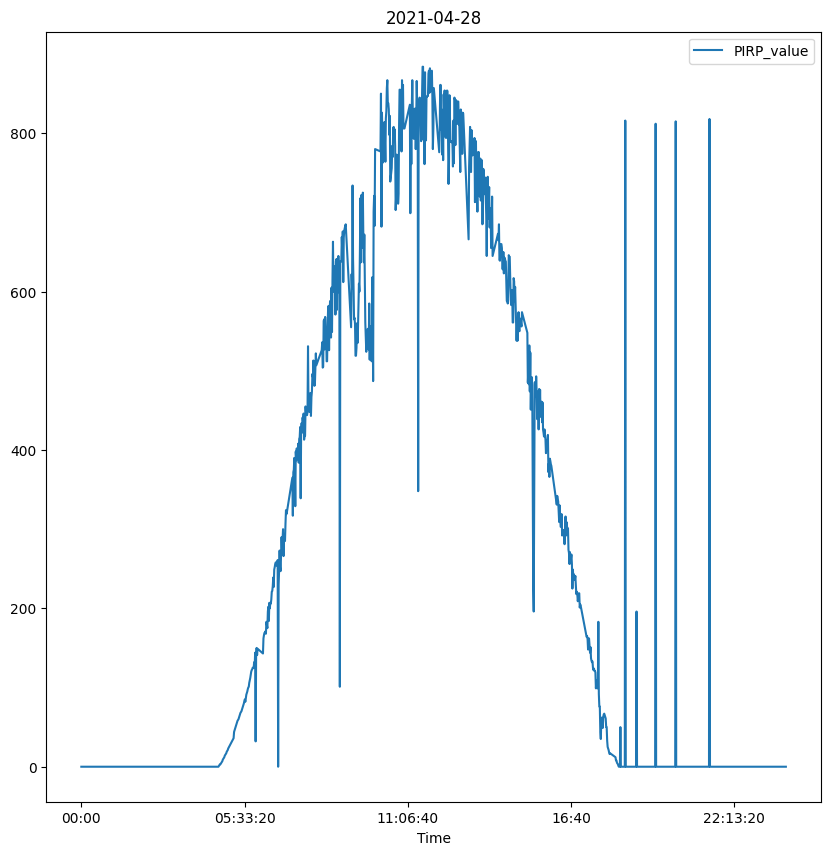

In [35]:
#Remove all lines that do not have a Time value
def time_pre(time_):
  if "TIME" in time_:
    return time_
  else:
    return np.nan
  
#Remove all lines that do not have an integer Pirp value
def pirp_present(pirp):
  if "PIRP" in pirp:
    return pirp
  else:
    return np.nan
i=0


#Using a sort of data interpolation in the case if the irradiance sensor capts and gives us outliers values
#Which are values below 0 and beyond 1000 W/m2
def reset_to_treshold(pirp):
    print("ok")
    global i
    global preceding_value
    if -200<=pirp<=0:
        #Returning 0 if the irradiance value is below between -200 and 0 because we judge that it may just be
        #an error from the sensor and the actual value is 0 (because the irradiance can't be negative)
        preceding_value=0
        return 0
    
    elif pirp<-200:
        #Returning the precedent value because in such case if like the sensor is detecting -1000 or in same cases
        #very large numbers like -10^5 W/m2, so it is probably an electrical problem on the sensor
        #so we replace the current value by the precedent one
        i+=1
        #current_index= data["PIRP_value"].index.get_loc(pirp)
        #preceding_value = (data.iloc[current_index-1]["PIRP_value"])
        #following_value = (data.iloc[index+1:index+2]["PIRP_value"])
        return preceding_value
    
    elif 1000<=pirp<=1100:
        #Returning 1000 is the sensor detects a value a little bit larger than 1000
        preceding_value=1000
        return preceding_value
    
        
    elif pirp>1100:
        #Returning the precedent value
        print("here")
        #print(data["PIRP_value"].index.get_loc(pirp))
        i+=1
        #current_index= data["PIRP_value"].index.get_loc(pirp)
        #preceding_value = (data.iloc[current_index-1]["PIRP_value"])
        #following_value = (data.iloc[index+1:index+2]["PIRP_value"])
        return preceding_value
    
    else:
        #return the same value if we are in any case above...
        preceding_value=pirp
        return pirp
    

def reset_to_treshold_d(row):
    
    pirp = row["PIRP_value"]
    
    if -200 <= pirp <= 0:
        preceding_value = 0
        return 0
    
    elif pirp < -200:
        #i += 1
        # Access the index of the current row
        current_index = row.name
        print("-200")
        # Access the preceding value from the previous row
        preceding_value = data.loc[current_index - 1, "PIRP_value"]
        # Access the following value from the next row
        #following_value = data.loc[current_index + 1, "PIRP_value"]
        return preceding_value
    
    elif 1000 <= pirp <= 1100:
        preceding_value = 1000
        return preceding_value
    
    elif pirp>1100:
        current_index = row.name
        print("1100")
        #print("here")
        #print(data["PIRP_value"].index.get_loc(pirp))
        #i+=1
        #current_index= data["PIRP_value"].index.get_loc(pirp)
        preceding_value = (data.loc[current_index-1,"PIRP_value"])
        #following_value = (data.loc[current_index+1,"PIRP_value"])
        return preceding_value
    
    else:
        current_index = int(row.name)
        print("else", current_index)
        pre_preceding_value = (data.loc[current_index-2,"PIRP_value"])+1
        fol_following_value = (data.loc[current_index+2,"PIRP_value"])+1
        if pirp>=5*pre_preceding_value or pirp>=5*fol_following_value:
           preceding_value=pre_preceding_value
           pirp=pre_preceding_value
           return pirp
        preceding_value=pirp
        return pirp


def reset_to_treshold_simple(pirp):
    #A simpler version of reseting values than the twos that we have seen before
    if pirp<=0:
        return 0
    elif pirp>=1000:
        return 1000
    else:
        return pirp
    

def deleting_columns(data):
    #Deleting unwanted columns
    columns_2_keep=[data.columns[2],data.columns[13]]
    data=data.drop(columns=[col for col in data.columns if col not in columns_2_keep],axis=1)
    return data
    
#Ressembling all the preprocessing and manipulation operation into one function
def preprocess_1(data):
    #Renaming columns
    data.rename(columns={data.columns[0]:"Time"},inplace=True)
    data.rename(columns={data.columns[1]:"PIRP_value"},inplace=True)

    #Droping missing values
    data.dropna(axis=0,inplace=True)
    data["Time"]=data["Time"].map(time_pre)
    data["PIRP_value"]=data["PIRP_value"].map(pirp_present)
    data.dropna(axis=0,inplace=True)

    #Removing the "Time=" and "PIRP=" from data
    data["Time"]=data["Time"].str.split("=").str[1]
    data["PIRP_value"]=data["PIRP_value"].str.split("=").str[1]

    #Making pirp values integers
    data["PIRP_value"]=data["PIRP_value"].astype(int)

    #Making Time values in datetime format
    data['Time'] = data["Time"].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S').time())

    #data.set_index("Time",inplace=True)
    #data["PIRP_value"] = data["PIRP_value"].map(lambda pirp: reset_to_treshold(pirp, data, data.index.get_loc()))
    #data["PIRP_value"]=data["PIRP_value"].map(reset_to_treshold_simple)
    #data["PIRP_value"] = data["PIRP_value"].map(reset_to_treshold)

    data=data.reset_index(drop=True)


    #data["PIRP_value"] = data.apply(reset_to_treshold, axis=1)

    #Applying the reseting operation on values
    data["PIRP_value"]=data["PIRP_value"].map(reset_to_treshold)

    data.plot(x="Time",y="PIRP_value",figsize=(10,10))
    plt.title("2021-04-28")

    return data

#Apply the function to a particular exemple
data_dir="csv_files_entire_data"
data_csv="2022-04-28.csv"
data=pd.read_csv(os.path.join(data_dir,data_csv), delimiter=';', error_bad_lines=False)
data=deleting_columns(data)
data=preprocess_1(data)
print("i=",i)
print(data["PIRP_value"].count())







In [38]:
def repartir(pirp):
  if 0<=pirp<=10:
    return "class 0"
  elif pirp>10 and pirp <=100:
    return "class 1"
  elif pirp>100:
    return "class 2"
  
"""def reset_to_treshold(pirp):
    if pirp<=0:
        return 0
    elif pirp>=1000:
        return 1000
    else:
        return pirp"""

def preprocess_2(data):
   #Applyin a second preprocessing operation
   #data["PIRP_value"]=data["PIRP_value"].map(reset_to_treshold)
   data["Category"]=data["PIRP_value"].map(repartir)
   return data

data=preprocess_2(data)


**Normally, before applying the reset operations on values, i observed that we had many outliers in our data and that's due to technical problems in the sensor, that's pushes me to apply reseting operations..., So here is what it was like...**

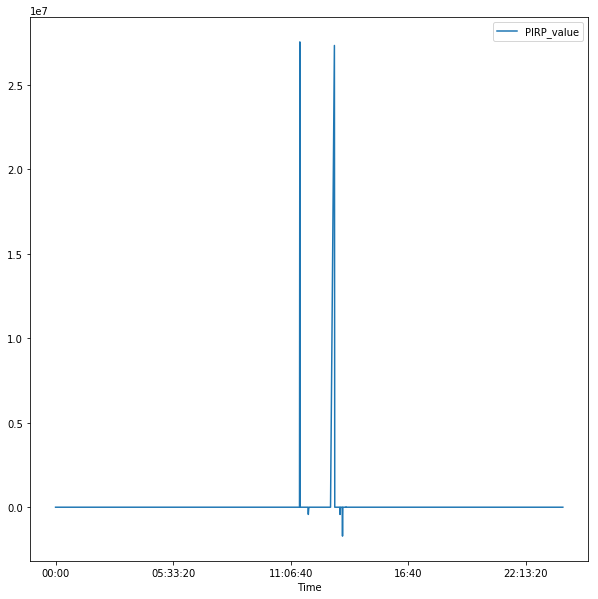

In [15]:
data.head()
data.plot(x="Time",y="PIRP_value",figsize=(10,10))
#Observing outliers in the plot which hides the relevent values in our data.

In [16]:
data.to_csv("data_test.csv",sep=';',index=False)

# 2- **Preprocess all the csv files and saving them**

In [ ]:
data_dir="csv_files"
#data_csv="2022-01-05.csv"
#data=pd.read_csv(os.path.join(data_dir,data_csv), delimiter=';')

def deleting_columns_upd(data):
    columns_2_keep=[data.columns[2],data.columns[13]]
    data=data.drop(columns=[col for col in data.columns if col not in columns_2_keep],axis=1)
    return data

def time_pre(time_):
  if "TIME" in time_:
    return time_
  else:
    return np.nan
  
def pirp_present(pirp):
  if "PIRP" in pirp:
    return pirp
  else:
    return np.nan
  
def reset_to_treshold(pirp):
    #print("ok")
    global i
    global preceding_value
    if -200<=pirp<=0:
        preceding_value=0
        return 0
    
    elif pirp<-200:
        i+=1
        #current_index= data["PIRP_value"].index.get_loc(pirp)
        #preceding_value = (data.iloc[current_index-1]["PIRP_value"])
        #following_value = (data.iloc[index+1:index+2]["PIRP_value"])
        return preceding_value
    
    elif 1000<=pirp<=1100:
        preceding_value=1000
        return preceding_value
    
        
    elif pirp>1100:
        #print("here")
        #print(data["PIRP_value"].index.get_loc(pirp))
        i+=1
        #current_index= data["PIRP_value"].index.get_loc(pirp)
        #preceding_value = (data.iloc[current_index-1]["PIRP_value"])
        #following_value = (data.iloc[index+1:index+2]["PIRP_value"])
        return preceding_value
    
    else:
        preceding_value=pirp
        return pirp
    
def reset_to_treshold_simple(pirp):
    if pirp<=0:
        return 0
    elif pirp>=1000:
        return 1000
    else:
        return pirp
    
def deleting_columns(data):
    columns_2_keep=[data.columns[2],data.columns[13]]
    data=data.drop(columns=[col for col in data.columns if col not in columns_2_keep],axis=1)
    return data
    
def preprocess_1(data):

    data.rename(columns={data.columns[0]:"Time"},inplace=True)
    data.rename(columns={data.columns[1]:"PIRP_value"},inplace=True)

    data.dropna(axis=0,inplace=True)
    data["Time"]=data["Time"].map(time_pre)
    data["PIRP_value"]=data["PIRP_value"].map(pirp_present)
    data.dropna(axis=0,inplace=True)

    data["Time"]=data["Time"].str.split("=").str[1]
    data["PIRP_value"]=data["PIRP_value"].str.split("=").str[1]

    data["PIRP_value"]=data["PIRP_value"].astype(int)

    data['Time'] = data["Time"].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S').time())

    data["PIRP_value"] = data["PIRP_value"].map(reset_to_treshold)

    return data

def repartir(pirp):
  if 0<=pirp<=10:
    return "class 0"
  elif pirp>10 and pirp <=100:
    return "class 1"
  elif pirp>100:
    return "class 2"
  
def preprocess_2(data):
   data["Category"]=data["PIRP_value"].map(repartir)
   return data


def construct_csv_folder(data_dir):
    if os.path.exists("preprocess_csv_files_new"):
       shutil.rmtree("preprocess_csv_files_new")
    os.makedirs("preprocess_csv_files_new")

    #Looping over all the files in the database
    for csv_file in os.listdir(data_dir):
        data=pd.read_csv(os.path.join(data_dir,csv_file), delimiter=';', error_bad_lines=False)
        
        # error_bad_lines- it states that there were 23 fields in certain lines while the expected number of fields was 18.
        # When you set error_bad_lines=False, it instructs pandas to skip the lines that have errors and continue reading the rest of the file. This is why you didn't receive an error message.
        #and we don't even need those lines because they are not containing Time or pirp
        i=1
        #print(data.shape[1])
        while data.shape[1]!=23:
           data=pd.read_csv(os.path.join(data_dir,csv_file), delimiter=';', error_bad_lines=False,skiprows=i)
           i+=1
        #print(data.shape[1])
        data=deleting_columns(data)
        #print(csv_file)

        data=preprocess_1(data)
        data=preprocess_2(data)

        #Saving modified csv files
        data.to_csv(os.path.join("preprocess_csv_files_new",csv_file),sep=';',index=False)

data_dir="csv_files_entire_data"
construct_csv_folder(data_dir)

# 3- **Visualising the new evolution of irradiance for any day**

**Evolution on some Automn days**

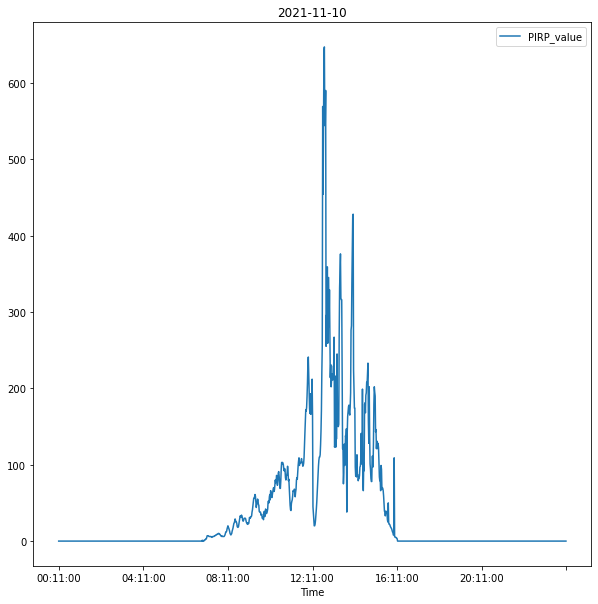

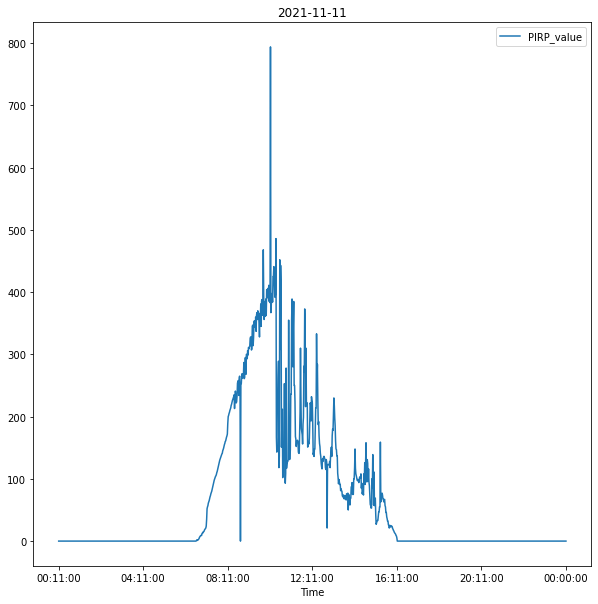

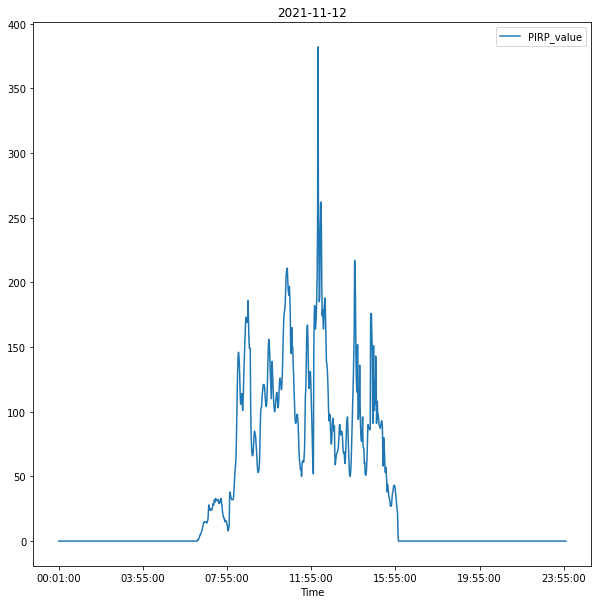

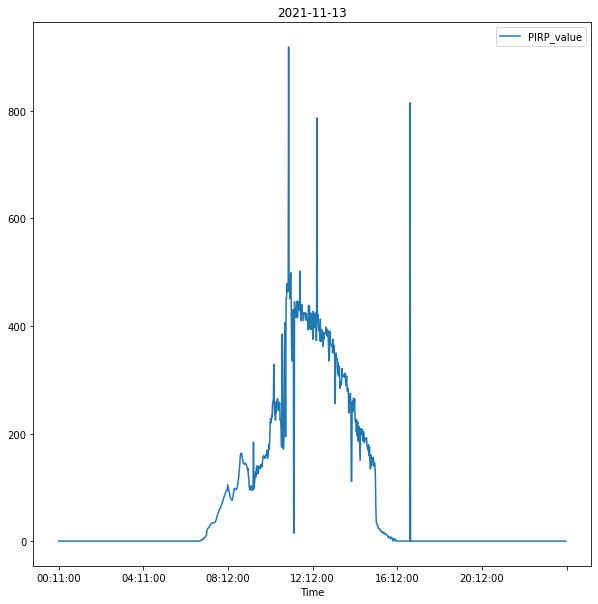

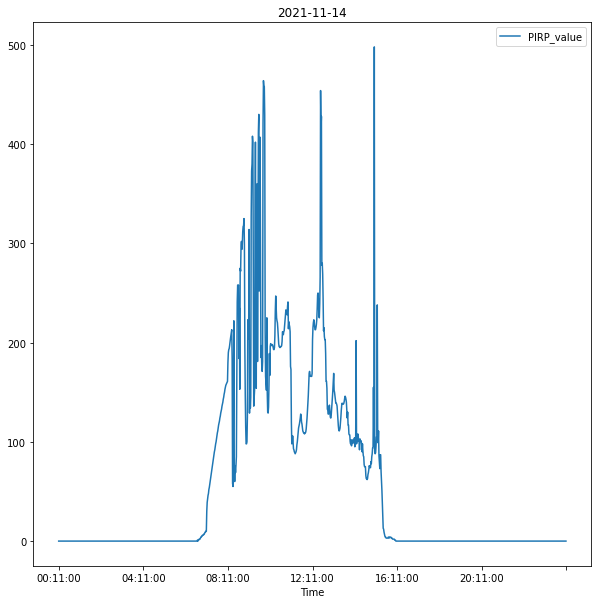

In [18]:
csv_dir=os.path.join("preprocess_csv_files_new")
for csv in os.listdir(csv_dir)[95:100]:
   data=pd.read_csv(os.path.join(csv_dir,csv), delimiter=';')
   data.plot(x="Time",y="PIRP_value",figsize=(10,10))
   plt.title(csv.split(".")[0])


**Evolution on some Winter days**

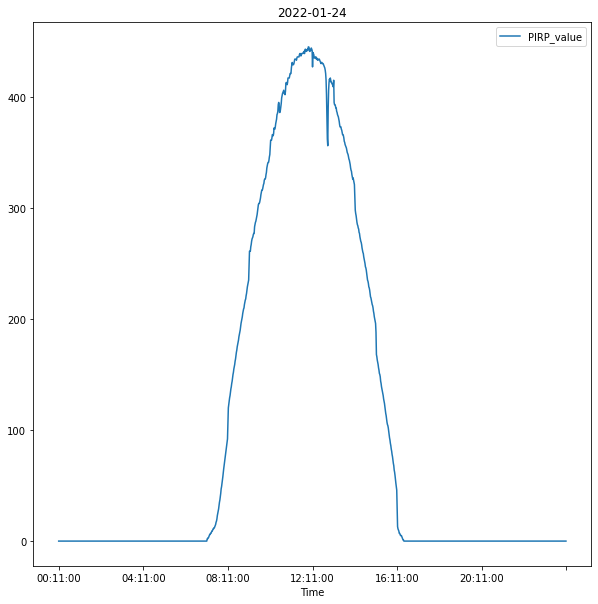

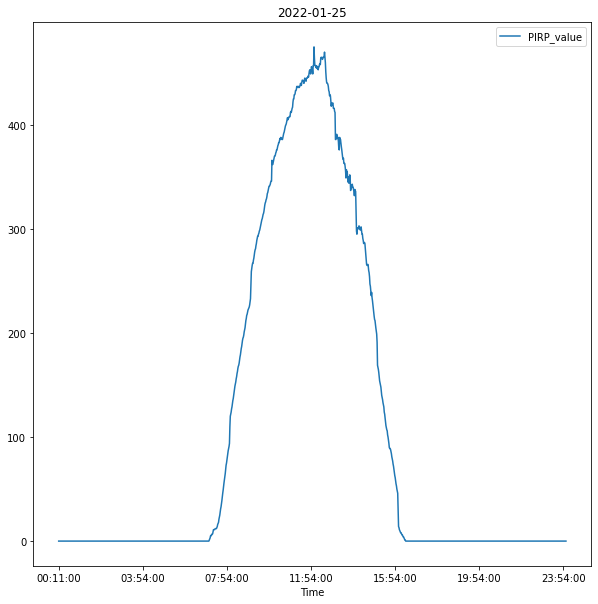

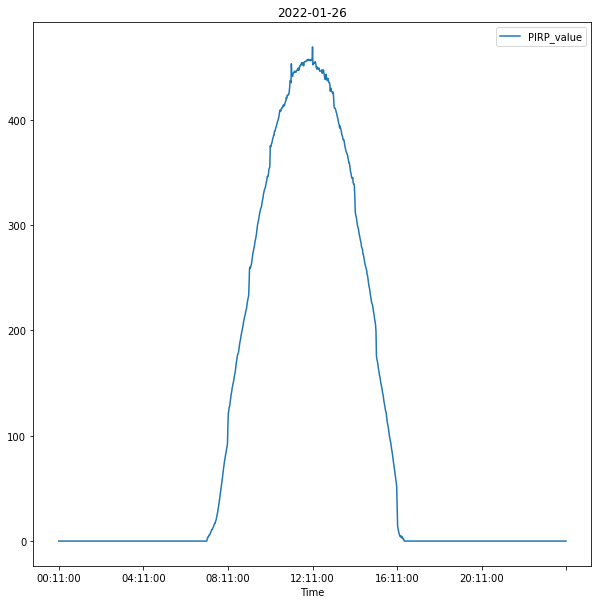

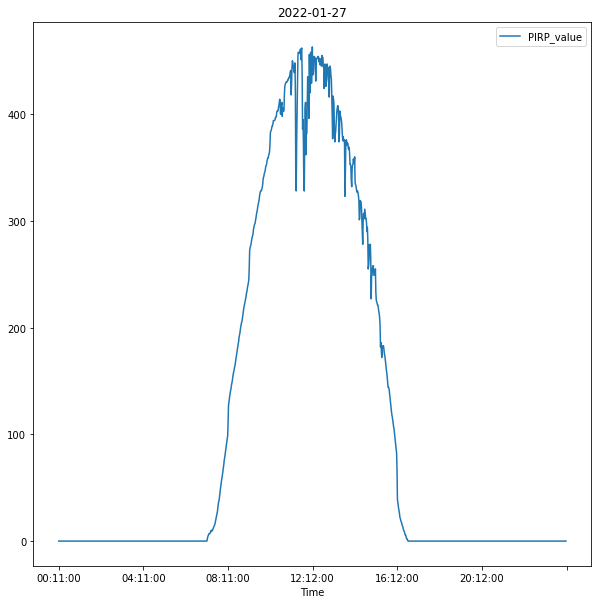

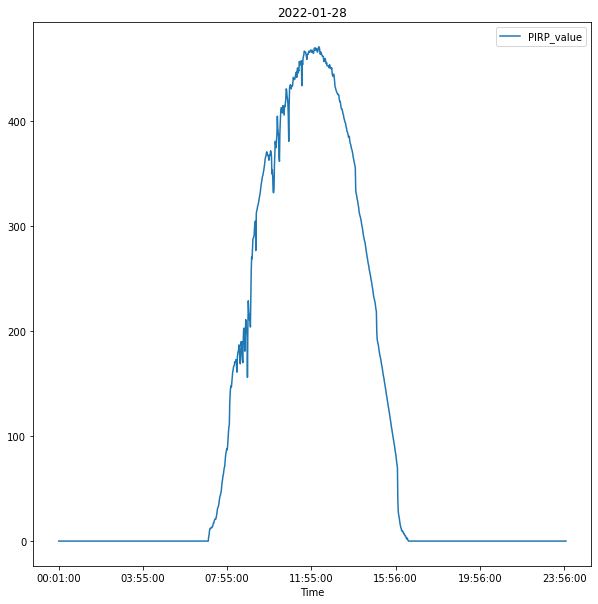

In [17]:
csv_dir=os.path.join("preprocess_csv_files_new")
for csv in os.listdir(csv_dir)[150:155]:
   data=pd.read_csv(os.path.join(csv_dir,csv), delimiter=';')
   data.plot(x="Time",y="PIRP_value",figsize=(10,10))
   plt.title(csv.split(".")[0])


**Evolution on some spring days**


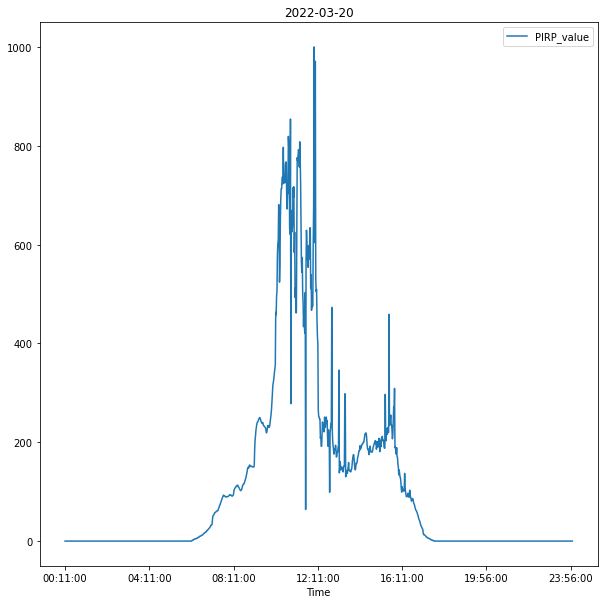

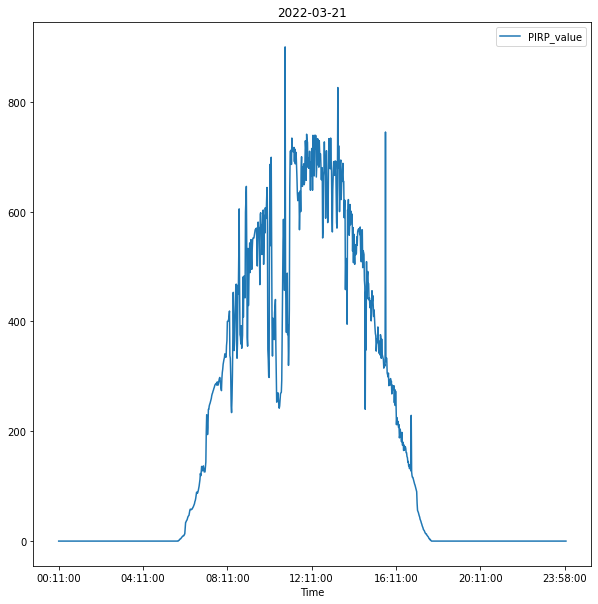

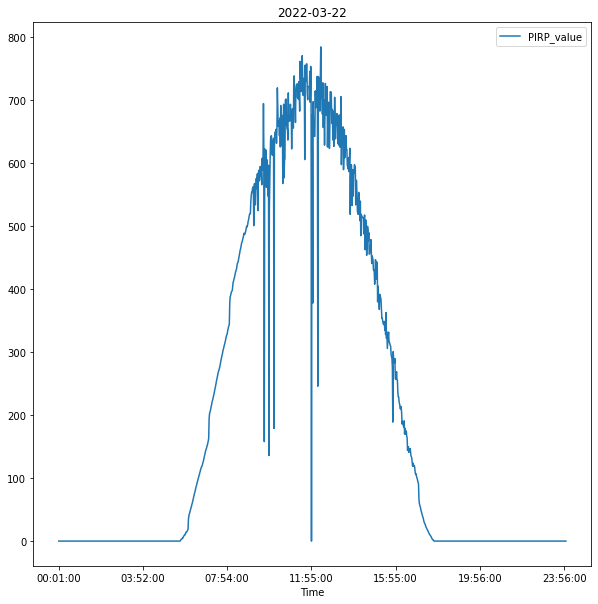

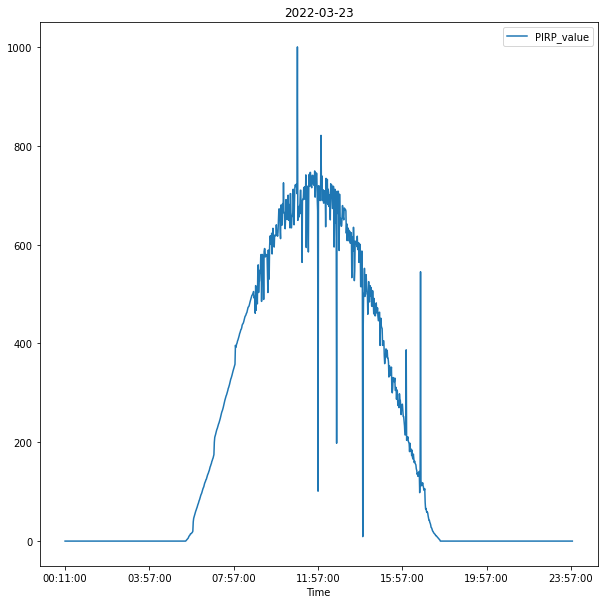

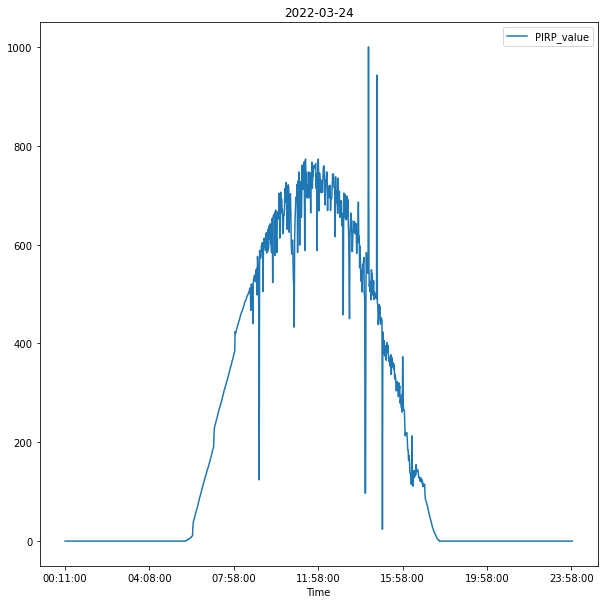

In [14]:
csv_dir=os.path.join("preprocess_csv_files_new")
for csv in os.listdir(csv_dir)[180:185]:
   data=pd.read_csv(os.path.join(csv_dir,csv), delimiter=';')
   data.plot(x="Time",y="PIRP_value",figsize=(10,10))
   plt.title(csv.split(".")[0])


**Evolution on some summer days**

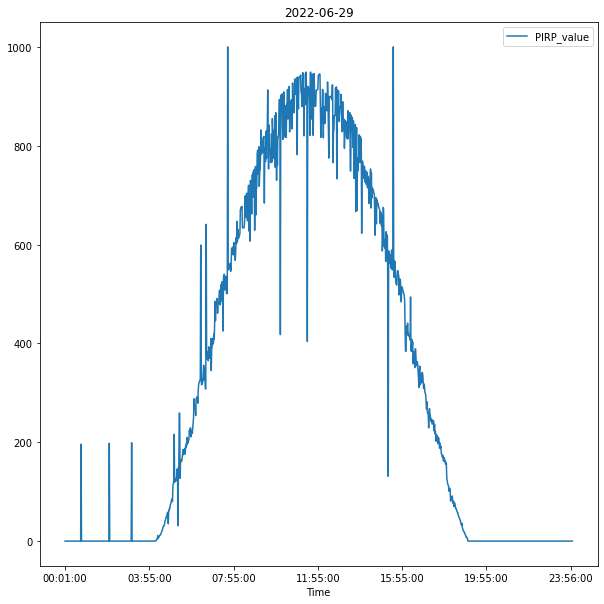

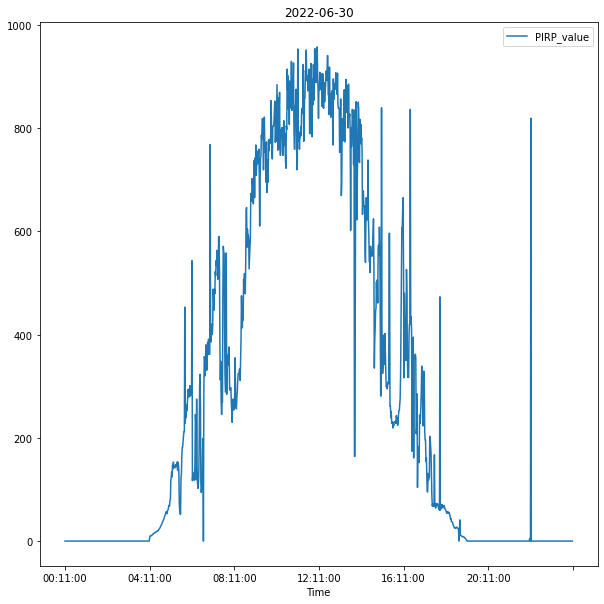

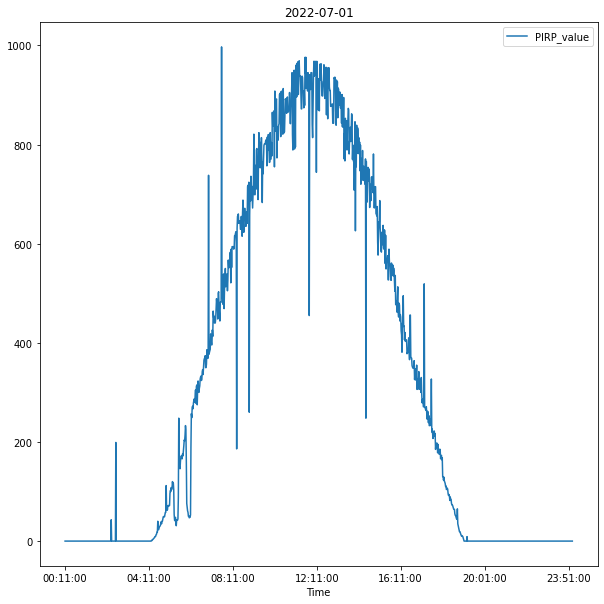

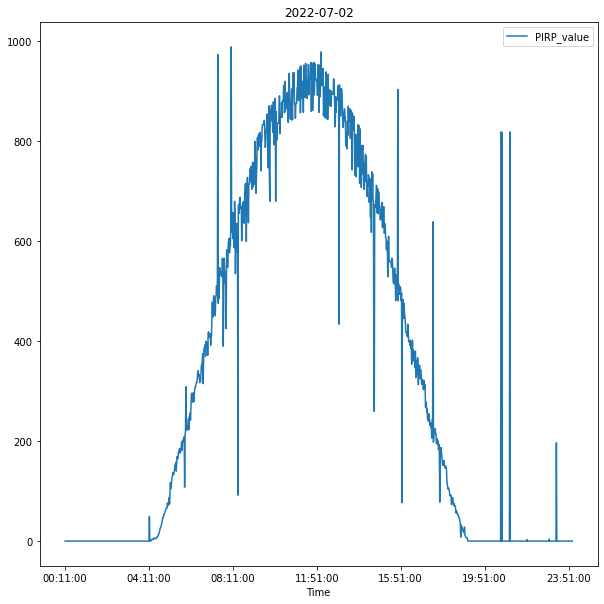

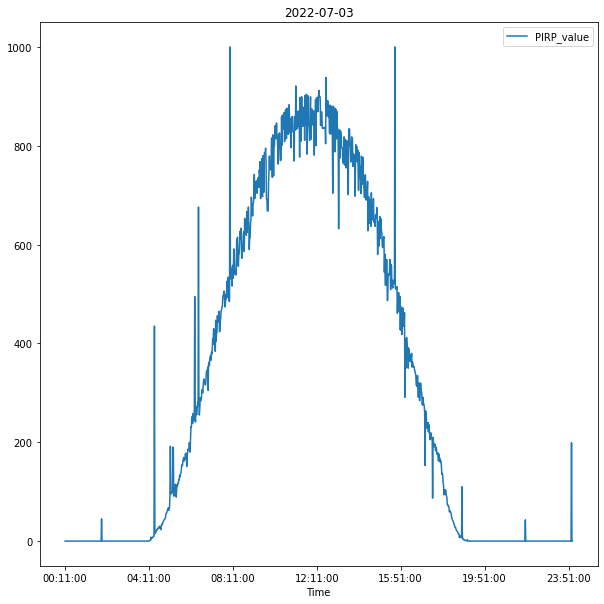

In [16]:
csv_dir=os.path.join("preprocess_csv_files_new")
for csv in os.listdir(csv_dir)[280:285]:
   data=pd.read_csv(os.path.join(csv_dir,csv), delimiter=';')
   data.plot(x="Time",y="PIRP_value",figsize=(10,10))
   plt.title(csv.split(".")[0])


In [77]:
#The next step can be to remove the values of class 0 to 10% of the total values because those null values 
#are not interesting when training our model but i prefer to test training without doing this operation
#and after maybe try to do it and compare the results...

#Also, there is some noise in the data but i prefered to train models with them so that the model can generalize well
#and also because of lack of time...
data.head()
serie=data.groupby(["Category"]).count()
print(serie)
#print(serie["class 0"]/(serie["class 1"]+serie["class 2"]+serie["class 0"])*100)
print(data)
data.to_csv("test.csv")

          Time  PIRP_value
Category                  
class 0    535         535
class 1     71          71
class 2    595         595
          Time  PIRP_value Category
0     00:11:00           0  class 0
1     00:12:00           0  class 0
2     00:13:00           0  class 0
3     00:14:00           0  class 0
4     00:15:00           0  class 0
...        ...         ...      ...
1196  23:57:00           0  class 0
1197  23:58:00           0  class 0
1198  23:59:00           0  class 0
1199  00:00:00           0  class 0
1200  00:00:00           0  class 0

[1201 rows x 3 columns]


In [73]:
#Here i have to remain only 10 or 15% or 0 irradiance data but before that let's match the pirp value with correponding 
#images and delete the ones that doesn't have matching values.
print(116/(116+71+565)*100)
print(int(15/85*(serie["class 1"]+serie["class 2"])))

15.425531914893616
117
